In [1]:
!pip install pyBibX

  Using cached chardet-5.2.0-py3-none-any.whl.metadata (3.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.2 MB/s eta 0:00:00m eta 0:00:0100:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 6.1 MB/s eta 0:00:00m eta 0:00:010:01:01m
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.3 MB/s eta 0:00:000:00:01m eta 0:

In [ ]:
# Required Libraries
import numpy as np
import pandas as pd
import textwrap

from pyBibX.base import pbx_probe
from google.colab import data_table
from prettytable import PrettyTable

In [ ]:
# Load .bib
# Arguments: file_bib = 'filename.bib'; db = 'scopus', 'wos', 'pubmed'; del_duplicated = True, False
file_name = 'SHAP.bib'
database  = 'scopus'
bibfile   = pbx_probe(file_bib = file_name, db = database, del_duplicated = True)

A Total of 5 Documents were Found ( 5 Documents and 0 Duplicates )

Conference paper = 5


In [ ]:
# Generate EDA (Exploratory Data Analysis) Report
report  = bibfile.eda_bib()

# Check Report
report

,Main Information,Results
0,Timespan,2013-2023
1,Total Number of Countries,6
2,Total Number of Institutions,11
3,Total Number of Sources,5
4,Total Number of References,0
5,Total Number of Languages,1
6,--english (# of docs),5
7,-//-,-//-
8,Total Number of Documents,5
9,--Conference paper,5


In [ ]:
# Check Docs IDs
data_table.DataTable(bibfile.table_id_doc, num_rows_per_page = 15)

,ID,Document
0,0,"Saini, Hardik and Saini, Kamaljit Singh (2023)..."
1,1,"Arya, Varsha and Almomani, Ammar Ali Deeb and ..."
2,2,"Mardhiah Ishak, Ainin and Mustapha, Aida and Z..."
3,3,"Debarr, Dave and Ramanathan, Venkatesh and Wec..."
4,4,"Thakur, Isha and Panda, Kajal and Kumar, Sanje..."


In [ ]:
# Check Docs IDs per Type
data_table.DataTable(bibfile.id_doc_types(), num_rows_per_page = 15)

,Document Types,IDs
0,Conference paper,"[0, 1, 2, 3, 4]"


In [ ]:
# Check Authors IDs
data_table.DataTable(bibfile.table_id_aut, num_rows_per_page = 15)

,ID,Author
0,a_0,"almomani, ammar ali deeb"
1,a_1,"arya, varsha"
2,a_2,"debarr, dave"
3,a_3,"helmy abd wahab, mohd"
4,a_4,"kumar, sanjeev"
5,a_5,"mardhiah ishak, ainin"
6,a_6,"mishra, anupama"
7,a_7,"mostafa, salama a"
8,a_8,"mustapha, aida"
9,a_9,"panda, kajal"


In [ ]:
# Check Sources IDs
data_table.DataTable(bibfile.table_id_jou, num_rows_per_page = 15)

,ID,Source
0,j_0,"pdgc - int. conf. parallel, distrib. grid comput."
1,j_1,lect. notes networks syst.
2,j_2,iop conf. ser. mater. sci. eng.
3,j_3,"int. conf. artif. intell. appl., icaia allianc..."
4,j_4,ieee isi - ieee int. conf. intell. secur. info...


In [ ]:
# Check Institutions IDs
data_table.DataTable(bibfile.table_id_uni, num_rows_per_page = 15)

,ID,Institution
0,i_0,george mason university
1,i_1,skyline university college
2,i_2,faculty electrical and electronic engineering
3,i_3,insights2techinfo
4,i_4,centre for development of advanced computing
5,i_5,faculty of computer science and information te...
6,i_6,swami rama himalayan university
7,i_7,facuty of applied and human sciences
8,i_8,university of zagreb
9,i_9,chandigarh university


In [ ]:
# Check Countries IDs
data_table.DataTable(bibfile.table_id_ctr, num_rows_per_page = 15)

,ID,Country
0,c_0,Malaysia
1,c_1,Croatia
2,c_2,India
3,c_3,United Arab Emirates
4,c_4,Iran
5,c_5,UNKNOW


In [ ]:
# Check Authors Keywords IDs
data_table.DataTable(bibfile.table_id_kwa, num_rows_per_page = 15)

,ID,KWA
0,k_0,random forest
1,k_1,urls
2,k_2,tf-idf
3,k_3,spectral clustering
4,k_4,spear phishing
5,k_5,spam
6,k_6,phishing
7,k_7,naive bayes
8,k_8,machine learning
9,k_9,logistic regression


In [ ]:
# Check Keywords Plus IDs
data_table.DataTable(bibfile.table_id_kwp, num_rows_per_page = 15)

,ID,KWP
0,p_0,random forests
1,p_1,electronic mail
2,p_2,logistics regressions
3,p_3,logistic regression
4,p_4,e-mail (spam)
5,p_5,deep learning
6,p_6,cybersecurity
7,p_7,cyber security
8,p_8,computer crime
9,p_9,websites


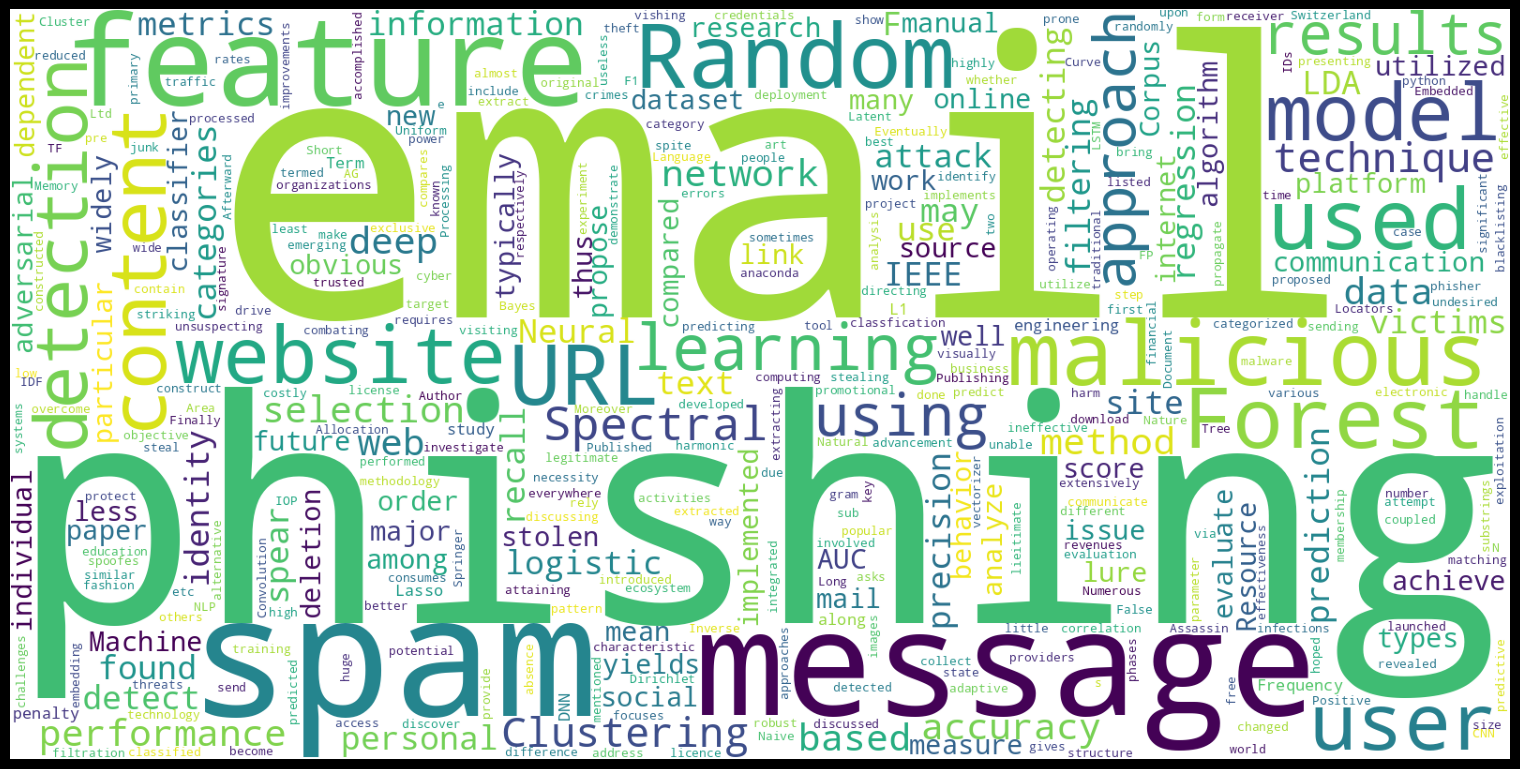

In [ ]:
# WordCloud from the Abstracts, Title, Authors Keywords or Keywords Plus
# Arguments: entry = 'abs', 'title', 'kwa', or 'kwp'
bibfile.word_cloud_plot(entry = 'abs', size_x = 15, size_y = 10, wordsn = 500)

In [ ]:
# Check Table
table             = PrettyTable()
data_wd           = bibfile.ask_gpt_wd
table.field_names = ['Word', 'Importance']
for key, value in data_wd.items():
    table.add_row([key, round(value, 4)])
print(table)

+----------------+------------+
|      Word      | Importance |
+----------------+------------+
|     email      |    1.0     |
|    phishing    |   0.8421   |
|      spam      |   0.7895   |
|    message     |   0.5789   |
|    feature     |   0.5263   |
|   malicious    |   0.4737   |
|     Random     |   0.4737   |
|     Forest     |   0.4211   |
|      used      |   0.4211   |
|      URL       |   0.4211   |
|     model      |   0.3684   |
|    content     |   0.3684   |
|    website     |   0.3684   |
|      user      |   0.3684   |
|   detection    |   0.3158   |
|    learning    |   0.3158   |
|    approach    |   0.2632   |
|     using      |   0.2632   |
|    results     |   0.2632   |
|    Spectral    |   0.2632   |
|   Clustering   |   0.2632   |
|   technique    |   0.2632   |
|      web       |   0.2105   |
|      data      |   0.2105   |
|     based      |   0.2105   |
|  performance   |   0.2105   |
|    accuracy    |   0.2105   |
|      deep      |   0.2105   |
|   sele

In [ ]:
# N-Grams
# Arguments: view       = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            entry      = 'abs', 'title', 'kwa', or 'kwp'
#            n_grams    = An integer with size n (representing the most common groups of words with size n)
#            stop_words = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                         'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                         'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                         'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus
#             wordsn           = Number of N-Grams
bibfile.get_top_ngrams(view = 'notebook', entry = 'kwp', ngrams = 3, stop_words = [], rmv_custom_words = [], wordsn = 15)

In [ ]:
# Check Table
data_ng = bibfile.ask_gpt_ng
data_table.DataTable(data_ng, num_rows_per_page = 15)

,Word,Freq
0,electronic mail extraction,1
1,mail extraction logistic,1
2,extraction logistic regression,1
3,logistic regression classifieds,1
4,regression classifieds mail,1
5,classifieds mail spam,1
6,mail spam electronic,1
7,spam electronic message,1
8,electronic message features,1
9,message features extraction,1


In [ ]:
# Documents Projection based on Words. (An interactive plot). It returns the Projection (each document coordinate) and the Labels (each document cluster)
# Arguments: view              = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            corpus_type       = 'abs', 'title', 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            custom_label      = A list of custom labels for each document. The user can define each document cluster;
#            custom_projection = A list of custom coordinates for each document. The user can define each document coordinate;
#            n_components      = Number of Dimensions;
#            n_clusters        = Number of Clusters;
#            tf_idf            = True or False (True -> The Cluster Algorithm will use the DTM to calculate each document Label. False -> The Cluster Algorithm will use the Coordinates to calculate each document Label)
#            embeddings        = True or False (True -> The Cluster Algorithm will use the Word Embeddings to calculate each document Label. False -> The Cluster Algorithm will use the Coordinates to calculate each document Label)
#            method            = 'tsvd' or 'umap' ('tsvd' -> Truncated SVD projection method is used. 'umap' -> UMAP projection method is used)
projection, labels = bibfile.docs_projection(view              = 'notebook',
                                             corpus_type       = 'abs',
                                             stop_words        = ['en'],
                                             rmv_custom_words  = [],
                                             custom_label      = [],
                                             custom_projection = [],
                                             n_components      = 2,
                                             n_clusters        = 5,
                                             tf_idf            = False,
                                             embeddings        = False,
                                             method            = 'umap')

In [ ]:
# Check Table
data_pr = pd.DataFrame(np.hstack([projection, labels.reshape(-1,1)]))
data_table.DataTable(data_pr, num_rows_per_page = 15)

,0,1,2
0,25.697094,-5.866121,1.0
1,24.592726,-5.407048,0.0
2,25.261980,-4.803046,2.0
3,24.974327,-6.245288,4.0
4,23.968868,-5.950048,3.0


In [ ]:
# Check Articles per Cluster
cluster      = 0
idx_articles = [i for i in range(0, labels.shape[0]) if labels[i] == cluster]
print(*idx_articles, sep = ', ')

1


In [ ]:
# Arguments: view              = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            key               = 'abs', 'title', 'jou, 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            topn              = Total number entities;
#            start             = Start Year; -1 = all years
#            end               = End Year;   -1 = all years
bibfile.plot_evolution_year(view             = 'notebook',
                            stop_words       = ['en'],
                            rmv_custom_words = [],
                            key              = 'abs',
                            topn             = 10,
                            start            = 2010,
                            end              = 2021)

In [ ]:
# View Table
data_ep = bibfile.ask_gpt_ep
print(textwrap.fill(data_ep, 150))

 2013: phishing (1), substrings (1), emerging (1), curve (1), traffic (1), harmonic (1), listed (1), robust (1), sending (1), low (1) 2020: phishing
(1), developed (1), theft (1), visiting (1), presenting (1), iop (1), financial (1), predicting (1), paper (1), emails (1)


In [ ]:
# Sankey Diagram (An interactive plot)
# Arguments: view  = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            entry = a list of any length of the following keys -> 'aut', 'cout', 'inst', 'jou', 'kwa', 'kwp', 'lan';
#            topn  = Total number entities
bibfile.sankey_diagram(view = 'notebook', entry = ['aut', 'cout', 'inst', 'lan'], topn = 10)

# PS: The white bars can be dragged

In [ ]:
# View Table
data_sk = bibfile.ask_gpt_sk
data_table.DataTable(data_sk, num_rows_per_page = 15)

,Node From,Node To,Connection Weigth
0,"saini, kamaljit singh",India,1
1,"ramanathan, venkatesh",UNKNOW_Countries,1
2,"debarr, dave",UNKNOW_Countries,1
3,"rafsanjani, marjan kuchaki",Iran,1
4,"panda, kajal",India,1
5,"thakur, isha",India,1
6,"mishra, anupama",India,1
7,"almomani, ammar ali deeb",United Arab Emirates,1
8,"helmy abd wahab, mohd",Malaysia,1
9,"saini, hardik",India,1


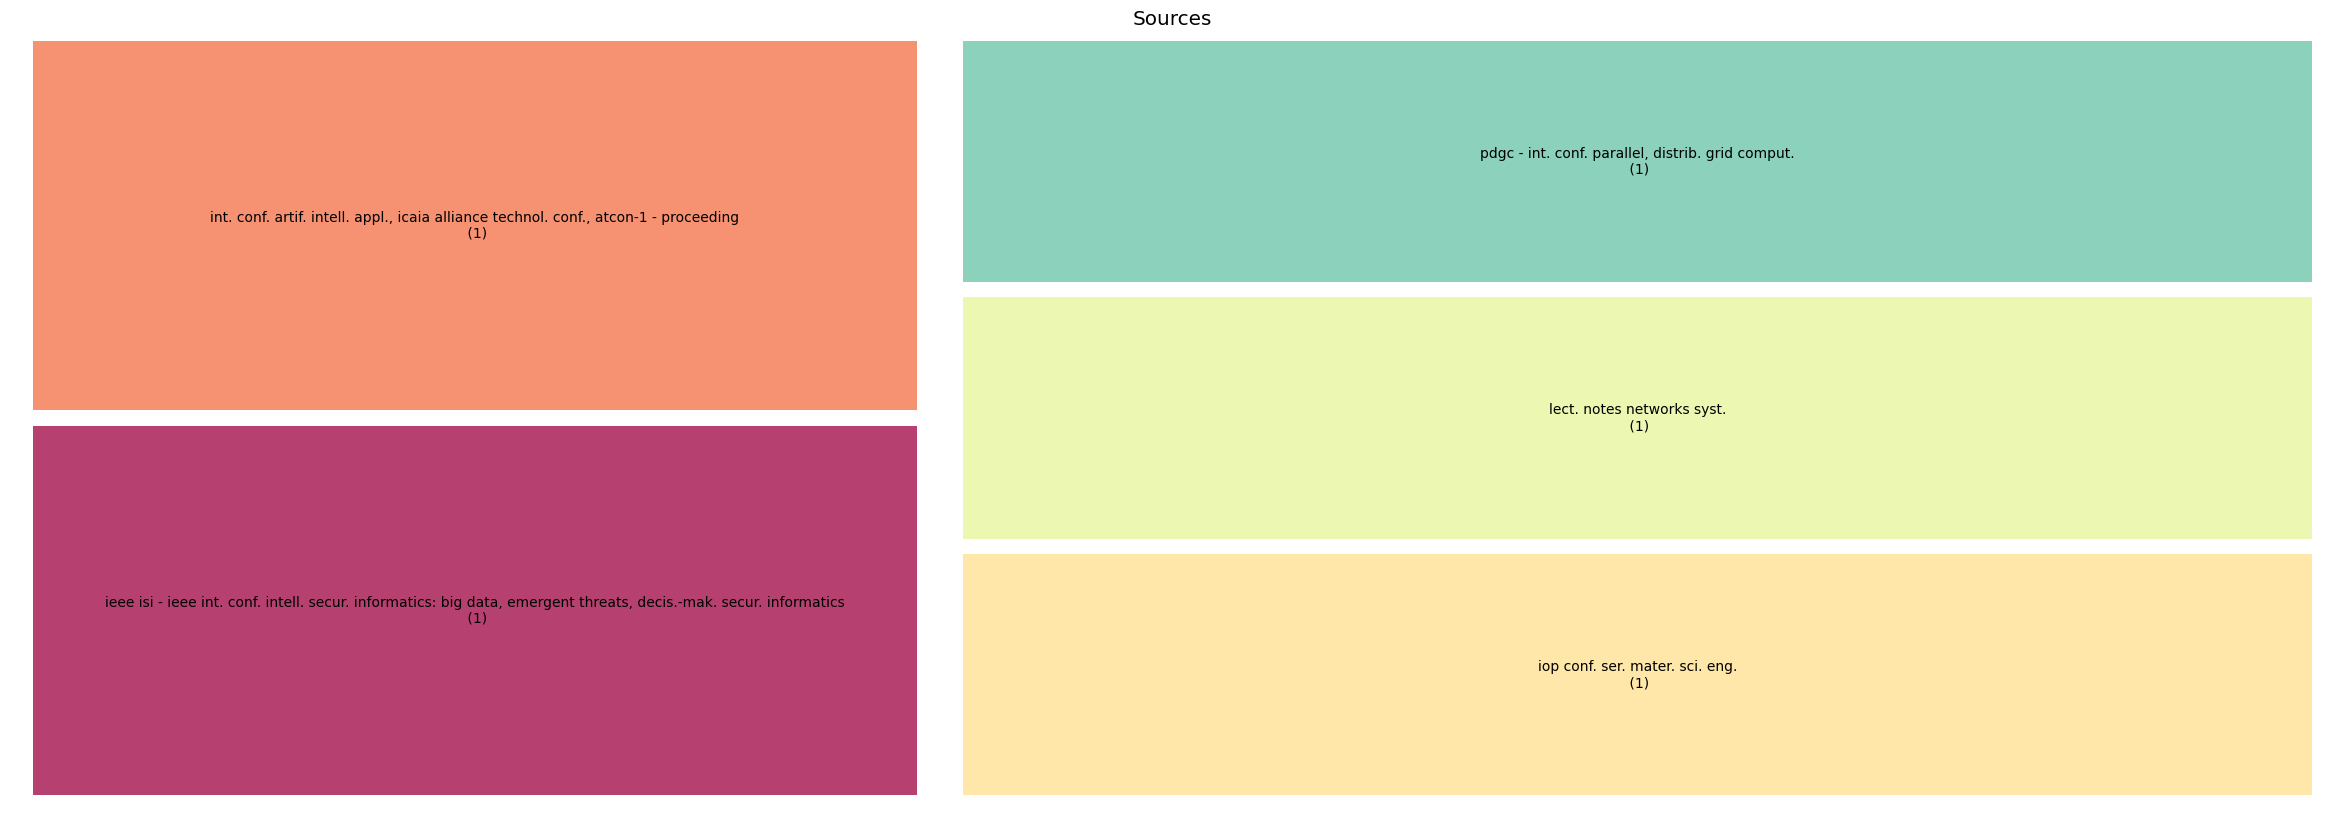

In [ ]:
# Tree Map
# Arguments: entry = 'kwp', 'kwa', 'aut', 'jou', 'ctr', or 'inst';
#            topn  = Total number entities
bibfile.tree_map(entry = 'jou', topn = 20, size_x = 30, size_y = 10)

In [ ]:
# Authors Productivity Plot (An interactive plot). It informs for each year the documents (IDs) published for each author
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            topn = Total number entities
bibfile.authors_productivity(view = 'notebook', topn = 20)

In [ ]:
# View Table
data_ap = bibfile.ask_gpt_ap
data_table.DataTable(data_ap, num_rows_per_page = 15)

,2013,2020,2022,2023
"zulkarnain syed idrus, syed",0.0,1.0,0.0,0.0
"wechsler, harry",1.0,0.0,0.0,0.0
"thakur, isha",0.0,0.0,1.0,0.0
"saini, kamaljit singh",0.0,0.0,0.0,1.0
"saini, hardik",0.0,0.0,0.0,1.0
"ramanathan, venkatesh",1.0,0.0,0.0,0.0
"rafsanjani, marjan kuchaki",0.0,0.0,0.0,1.0
"peraković, dragan",0.0,0.0,0.0,1.0
"panda, kajal",0.0,0.0,1.0,0.0
"mustapha, aida",0.0,1.0,0.0,0.0


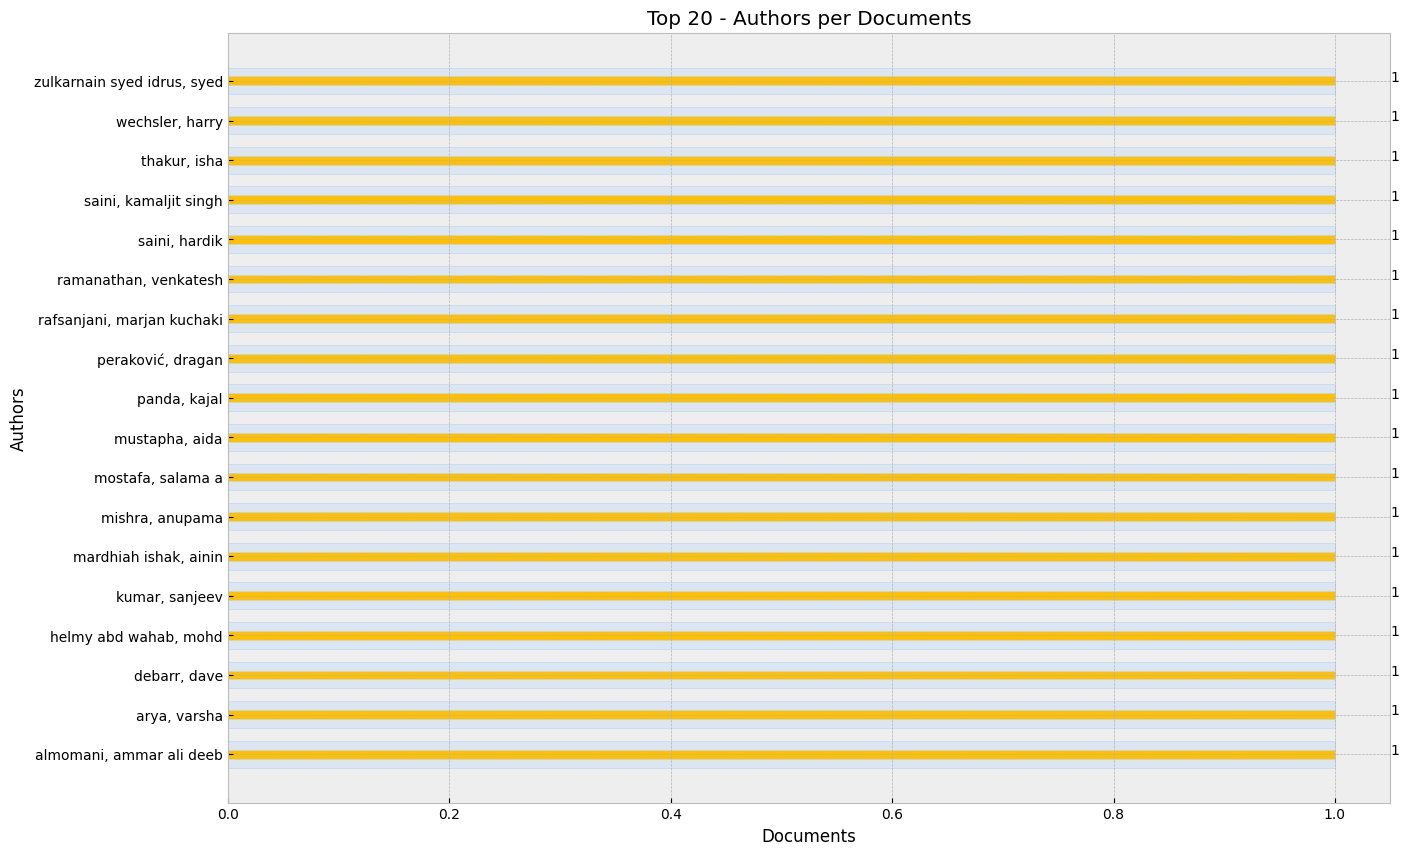

In [ ]:
# Bar Plots
# Arguments: statistic = 'dpy', 'cpy', 'ppy', 'ltk', 'spd', 'spc', 'apd', 'apc', 'aph', 'bdf_1', 'bdf_2', 'bdf_3', 'ipd', 'ipc', 'cpd', 'cpc', 'lpd', 'kpd', 'kad'
#                        'dpy' = Documents per Year
#                         cpy' = Citations per Year
#                        'ppy' = Past Citations per Year
#                        'ltk' = Lotka's Law
#                        'spd' = Sources per Documents
#                        'spc' = Sources per Citations
#                        'apd' = Authors per Documents
#                        'apc' = Authors per Citations
#                        'aph' = Authors per H-Index
#                        'bdf_1', 'bdf_2', 'bdf_3' = Bradford's Law - Core Sources 1, 2 or 3
#                        'ipd' = Institutions per Documents
#                        'ipc' = Institutions per Citations
#                        'cpd' = Countries per Documents
#                        'cpc' = Countries per Citations
#                        'lpd' = Language per Documents
#                        'kpd' = Keywords Plus per Documents
#                        'kad' = Authors' Keywords per Documents
#            topn      = Total number entities
bibfile.plot_bars(statistic = 'apd', topn = 20, size_x = 15, size_y = 10)

In [ ]:
# View Table
data_bp = bibfile.ask_gpt_bp
data_table.DataTable(data_bp, num_rows_per_page = 15)

,Documents,Authors
0,"zulkarnain syed idrus, syed",1
1,"wechsler, harry",1
2,"thakur, isha",1
3,"saini, kamaljit singh",1
4,"saini, hardik",1
5,"ramanathan, venkatesh",1
6,"rafsanjani, marjan kuchaki",1
7,"peraković, dragan",1
8,"panda, kajal",1
9,"mustapha, aida",1


In [ ]:
# Network - Citation Analisys Between Documents (Blue Nodes) and Citations (Red Nodes).  (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            min_count   = Relationship between nodes that have been cited at least x times;
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            local_nodes = True or False (True -> Only the blue will be displayed, False -> Red and Blue nodes will be displayed)
bibfile.network_adj_dir(view = 'notebook', min_count = 7, node_labels = True, local_nodes = False)

In [ ]:
# View Table
data_nad = bibfile.ask_gpt_nad
data_table.DataTable(data_nad, num_rows_per_page = 15)

,Paper,Cited Reference


In [ ]:
# Network - Highlight Citation Analysis Between Documents (Blue Nodes) and Citations (Red Nodes).  (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            article_ids = A list of Blue Nodes. It indicates the documents cited by them;
#            ref_ids     = A list of Red Nodes. It indicates the documents that cites them
bibfile.find_nodes_dir(view = 'notebook', article_ids = ['44', '235'], ref_ids = [])

ValueError: ignored

In [ ]:
# Network - Highlight Citation Analysis Between Documents (Blue Nodes) and Citations (Red Nodes).  (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            article_ids = A list of Blue Nodes. It indicates the documents cited by them;
#            ref_ids     = A list of Red Nodes. It indicates the documents that cites them
bibfile.find_nodes_dir(view = 'notebook', article_ids = [], ref_ids = ['r_5605'])

In [ ]:
# Network - Local Documents (Only Blue Nodes) Citation History. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            min_count   = Relationship between nodes that have connected at least x times;
#            node_size   = -1. (If node_size = -1 then the default value will be used. If node_size > 0 then this new value will be used);
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            back        = A list of documents. It shows the documents cited by them direct and indirectly;
#            forward     = A list of documents. It shows the documents that cites them direct and indirectly
bibfile.network_hist(view = 'notebook', min_count = 0, node_size = -1, node_labels = True, back = [], forward = [])

In [ ]:
# View Table
data_hist = bibfile.ask_gpt_hist
data_table.DataTable(data_hist, num_rows_per_page = 15)

In [ ]:
# Network - Local Documents (Only Blue Nodes) Citation History. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            min_count   = Relationship between nodes that have connected at least x times;
#            node_size   = -1. (If node_size = -1 then the default value will be used. If node_size > 0 then this new value will be used);
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            back        = A list of documents. It shows the documents cited by them direct and indirectly;
#            forward     = A list of documents. It shows the documents that cites them direct and indirectly
bibfile.network_hist(view = 'notebook', min_count = 0, node_size = -1, node_labels = True, back = ['24'], forward = [])

In [ ]:
# Network - Local Documents (Only Blue Nodes) Citation History. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            min_count   = Relationship between nodes that have connected at least x times;
#            node_size   = -1. (If node_size = -1 then the default value will be used. If node_size > 0 then this new value will be used);
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            back        = A list of documents. It shows the documents cited by them direct and indirectly;
#            forward     = A list of documents. It shows the documents that cites them direct and indirectly
bibfile.network_hist(view = 'notebook', min_count = 0, node_size = -1, node_labels = True, back = [], forward = ['97'])

In [ ]:
# Network - Collaboration Analysis Between Authors, Countries, Intitutions Or Adjacency Analysis Between Authors' Keywords or Keywords Plus. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            adj_type    = 'aut', 'cout', 'inst', 'kwa', or 'kwp'
#            min_count   = Relationship between nodes that have connected at least x times;
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            node_size   = -1. (If node_size = -1 then the default value will be used. If node_size > 0 then this new value will be used);
#            label_type  = 'id', 'name' (Only meaningfull if node_labels = True. 'id' -> The ID will be displayed; 'name' -> The name will be displayed);
#            centrality  = 'degree', 'load', 'betw', 'close', 'eigen', 'katz', 'harmonic', or None. Color nodes according to centrality criterion
#                          'degree'   = Degree Centrality
#                          'load'     = Load Centrality
#                          'betw'     = Betweenness Centrality
#                          'close'    = Closeness Centrality
#                          'eigen'    = Eigenvector Centrality
#                          'katz'     = Katz Centrality
#                          'harmonic' = Harmonic Centrality
#                           None      = The Community Algorithm, Girvan-Newman, will be used Instead of a Centrality Criterion
bibfile.network_adj(view = 'notebook', adj_type = 'aut', min_count = 5, node_labels = True, label_type = 'name', centrality = None)

# PS: If a centrality criterion is used then the values can be obtained by the following command:  bibfile.table_centr

In [ ]:
# View Table
data_adj = bibfile.ask_gpt_adj
data_table.DataTable(data_adj, num_rows_per_page = 15)

In [ ]:
# Network - Highlight  Collaboration Analysis Between Authors, Countries, Intitutions Or Adjacency Analysis Between Authors' Keywords or Keywords Plus. (An interactive plot).
# Arguments: view      = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            node_ids  = A list of IDs. Only meaningfull if label_type = 'id';
#            node_name = A list of Names. Only meaningfull iflabel_type = 'name';
#            node_only = True or False (True -> Only the Node will be Highlighted, False -> Node and its Connections will be Highlighted)
bibfile.find_nodes(node_ids = [], node_name = ['figueira, j.r.'], node_only = False)

In [ ]:
# Network - Similarity Analysis using coupling or cocitation methods. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            sim_type    = 'coup', 'cocit' ('coup' -> Coupling Method, 'cocit' -> Cocitation Method)
#            node_size   = -1. (If node_size = -1 then the default value will be used. If node_size > 0 then this new value will be used);
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            cut_coup    = Cutoff value for Coupling Method. Only meaninfull if sim_type = 'coup';
#            cut_cocit   = Cutoff value for Cocitation Method. Only meaninfull if sim_type = 'cocit'
bibfile.network_sim(view = 'notebook', sim_type = 'cocit', node_size = 10, node_labels = True, cut_coup = 0.3, cut_cocit = 5)

In [ ]:
# Check Similarity Values
data_table.DataTable(bibfile.sim_table, num_rows_per_page = 15)

In [ ]:
# Network - Collaboration Analysis Between Countries using a Map. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            connections = True or False (True -> Countries connections will be displayed, False -> Countries connections will not be displayed);
#            country_lst = Highlight the Connections Between a List of Countries
bibfile.network_adj_map(view = 'notebook', connections = True, country_lst = [])

In [ ]:
# View Table
data_map = bibfile.ask_gpt_map
data_table.DataTable(data_map, num_rows_per_page = 15)

In [ ]:
# Network - Collaboration Analysis Between Countries using a Map. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            connections = True or False (True -> Countries connections will be displayed, False -> Countries connections will not be displayed);
#            country_lst = Highlight the Connections Between a List of Countries
bibfile.network_adj_map(view = 'notebook', connections = False, country_lst = ['Mexico'])

In [ ]:
# NLP
# Arguments: corpus_type       = 'abs', 'title', 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
bibfile.create_embeddings(stop_words = ['en'], rmv_custom_words = [], corpus_type = 'abs')
emb = bibfile.embds

In [ ]:
# NLP #-1 refers to all outliers and should typically be ignored.
# Arguments: stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                              'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                              'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                              'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainianian;   'es' =  Spanish;  'sv' = Swedish
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            embeddings        = True or False. If True then word embeddings are used to create the topics
bibfile.topics_creation(stop_words = ['en'], rmv_custom_words = [], embeddings = False)

In [ ]:
# NLP
# Each document Topic
topics = bibfile.topics

In [ ]:
# NLP
# Each document Probability to belong a Topic
probs = bibfile.probs

In [ ]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics_distribution(view = 'notebook')

In [ ]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics(view = 'notebook')

In [ ]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics_projection(view = 'notebook')

In [ ]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics_heatmap(view = 'notebook')

In [ ]:
# NLP
bibfile.topics_representatives()

In [ ]:
# NLP
similar_topics, similarity = bibfile.topic_model.find_topics('electre', top_n = 10)
for i in range(0, len(similar_topics)):
  print('Topic: ', similar_topics[i], 'Correlation: ', round(similarity[i], 3))

In [ ]:
# NLP
bibfile.topic_model.save('my_topic_model')
#loaded_topic_model = BERTopic.load('my_topic_model')

In [ ]:
# NLP - Abstractive Summarization
# Arguments: article_ids = A list of documents to perform an abstractive summarization with the available abstracts. If the list is empty then all documents will be used
#            model_name  = Available pre-trained models. Complete list is available at  https://huggingface.co/models?pipeline_tag=summarization&sort=downloads&search=pegasus
abs_summary = bibfile.summarize_abst_peg(article_ids = [218, 28, 212], model_name = 'google/pegasus-xsum')

In [ ]:
# NLP - Check Abstractive Summarization
print(textwrap.fill(abs_summary, 150))

In [ ]:
# NLP - Abstractive Summarization - chatGPT

# OBS 1: Requires the user to have an **API key** (https://platform.openai.com/account/api-keys))
# OBS 2: The limit of characters is 4097 per request

# Arguments: article_ids   = A list of documents to perform an abstractive summarization with the available abstracts. If the list is empty then all documents will be used
#            join_articles = If False then the abstracts will be analyzed separately. If True then the abstracts will be concate in a single text
#            api_key       = 'your_api_key_here'. Insert your personal API key (https://platform.openai.com/account/api-keys)
#            model         = Specifies the AI model used for text generation. The default value is "text-davinci-003"
#            query         = Ask chatGPT what you want to do with the abstracts. The default query is: 'from the following scientific abstracts, summarize the main information in a single paragraph using around 250 words'
abs_summary_chat = bibfile.summarize_abst_chatgpt(article_ids = [218, 28, 212], join_articles = True, api_key = 'your_api_key_here', query = 'from the following scientific abstracts, summarize the main information in a single paragraph using around 250 words', model = 'gpt-4')

In [ ]:
# NLP - Check Abstractive Summarization
print(textwrap.fill(abs_summary_chat, 250))

In [ ]:
# NLP - Extractive Summarization
# Arguments: article_ids = A list of documents to perform an extractive summarization with the available abstracts. If the list is empty then all documents will be used
ext_summary = bibfile.summarize_ext_bert(article_ids = [218, 28, 212])

In [ ]:
# NLP - Check Extractive Summarization
print(textwrap.fill(ext_summary, 150))

In [ ]:
# Filter the .bib File
# Arguments: document = A list of documents to retain. The other documents will be deleted
#            doc_type = A list of doc types. Check the 'report' to select the available types;
#            year_str = An integer the determines the starting year of collection -1 = All years;
#            year_end = An integer the determines the ending year of collection   -1 = All years;
#            sources  = A list of sources. Check the cell '# Check Sources IDs' to select the available types;
#            core     = A integer (-1, 1, 2, 3, 12, or 23) -1 = All sources, 1 = Bradford core 1, 2 = Bradford core 2, 3 = Bradford core 3, 12 = Bradford core 1 and 2, 23 = Bradford core 2 and 3;
#            country  = A list of countries. Check the cell '# Check Countries IDs' to select the available types;
#            language = A list of languages. Check the 'report' to select the available types
#            abstract = True or False. True removes UNKNOW values from the abstract.
bibfile.filter_bib(documents = [], doc_type = [], year_str = -1, year_end = -1, sources = [], core = -1, country = [], language = [], abstract = False)

In [ ]:
# Correct the .bib File
# Arguments: get         = A list of the current name(s);
#            replace_for = A string. This string will replace all matchs from the 'get' argument list
bibfile.merge_author(get = [], replace_for = 'name')
bibfile.merge_institution(get = [], replace_for = 'name')
bibfile.merge_country(get = [], replace_for = 'name')
bibfile.merge_language(get = [], replace_for = 'name')
bibfile.merge_source(get = [], replace_for = 'name')